In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, roc_curve, auc)

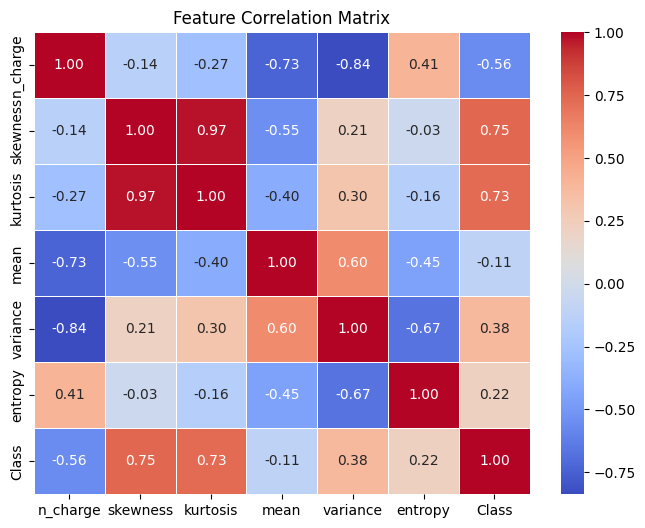

In [28]:
# Load dataset
file_path = 'data_PD.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Feature selection
X = df[['n_charge', 'skewness', 'kurtosis', 'mean', 'variance', 'entropy']]
y = df['Class']

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.savefig("corr.svg")
plt.show()

In [29]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert labels to binary using One-vs-All
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)


Evaluating SVM with linear kernel
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115



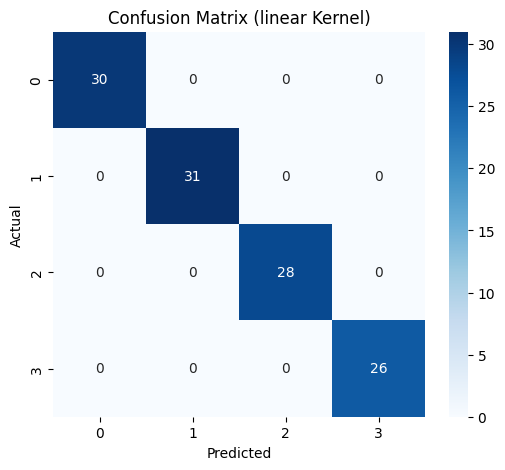

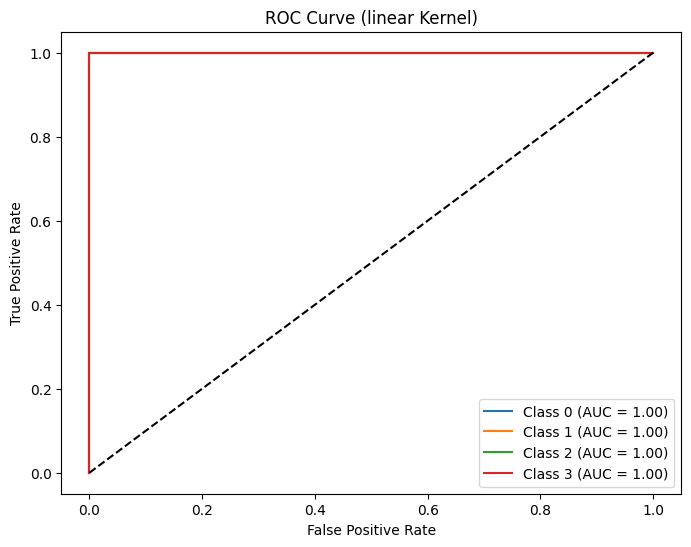


Evaluating SVM with rbf kernel
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115



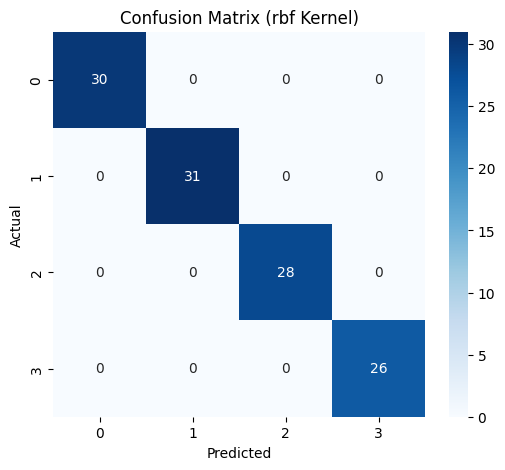

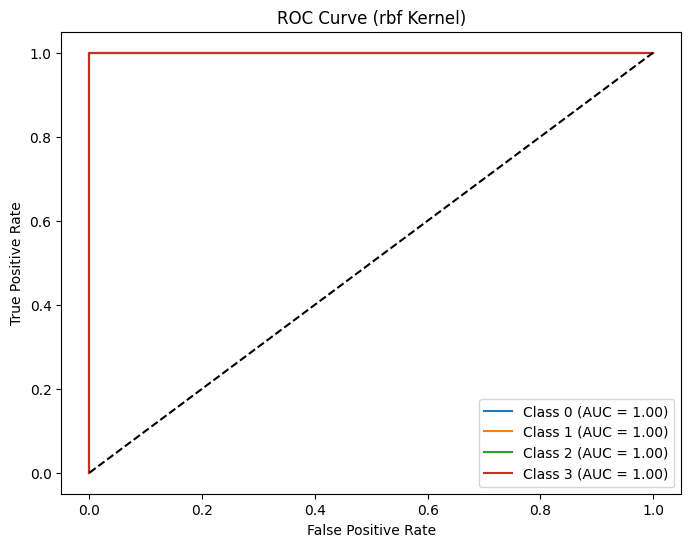


Evaluating SVM with poly kernel
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115



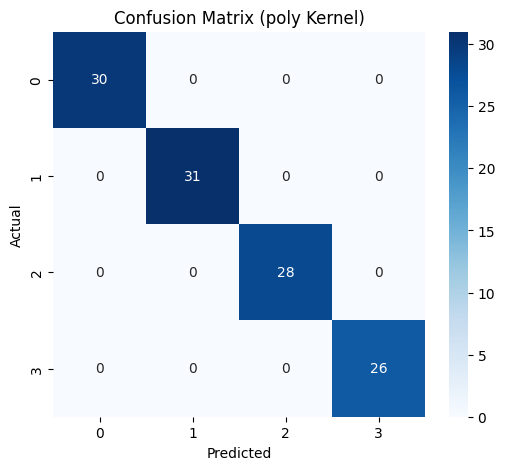

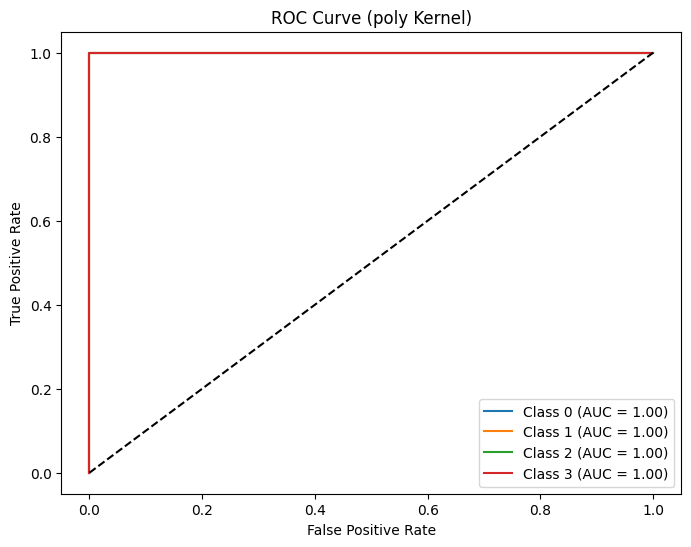


Evaluating SVM with sigmoid kernel
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115



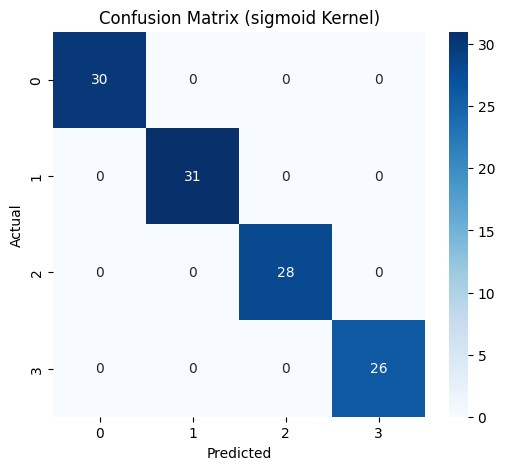

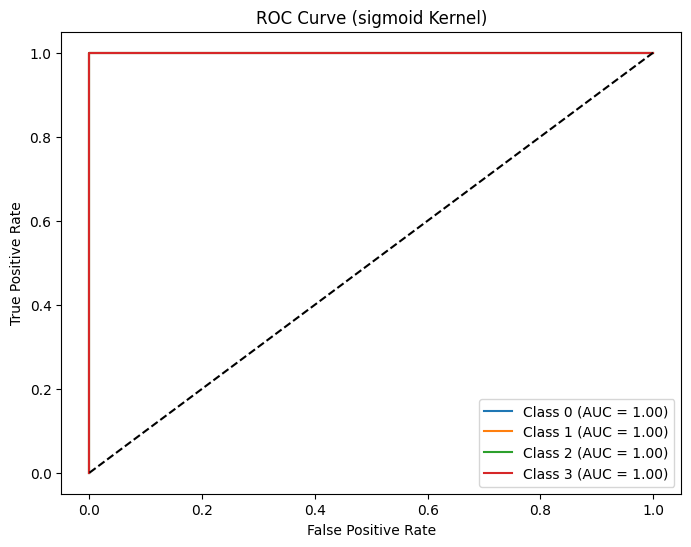

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bin, test_size=0.2, random_state=42)

# List of SVM kernels to test
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Evaluate models with different kernels
for kernel in kernels:
    print(f"\nEvaluating SVM with {kernel} kernel")
    
    models = []
    y_pred_prob = []  # Store predicted probabilities

    for i in range(y_bin.shape[1]):
        model = SVC(kernel=kernel, probability=True)
        model.fit(X_train, y_train[:, i])
        models.append(model)
        y_pred_prob.append(model.predict_proba(X_test)[:, 1])  # Probability for ROC

    # Convert predictions to class labels
    y_pred_prob = np.array(y_pred_prob).T  # Shape (num_samples, num_classes)
    y_pred = np.array([model.predict(X_test) for model in models]).T
    y_pred_class = lb.inverse_transform(y_pred)
    y_test_class = lb.inverse_transform(y_test)
    
    # Predict classes
    y_pred = np.array([model.predict(X_test) for model in models]).T
    y_pred_class = lb.inverse_transform(y_pred)
    y_test_class = lb.inverse_transform(y_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test_class, y_pred_class))

    # Confusion Matrix
    cm = confusion_matrix(y_test_class, y_pred_class)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=lb.classes_, yticklabels=lb.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix ({kernel} Kernel)")
    plt.savefig(f"confusion_matrix_{kernel}.svg")
    plt.show()
    PD = ["Corona", "Internal", "Surface", "Noise"]
    # ROC Curve and AUC
    plt.figure(figsize=(8, 6))
    for i in range(y_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({kernel} Kernel)")
    plt.legend(loc="lower right")
    plt.savefig(f"roc_{kernel}.svg")
    plt.show()